In [165]:
import numpy as np
import pandas as pd

In [166]:
df = pd.read_csv(r"C:\Users\Zenia\Downloads\hotel_bookings\hotel_bookings.csv")
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


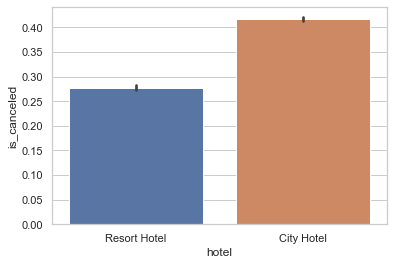

In [212]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="hotel", y="is_canceled", data=df)
ax

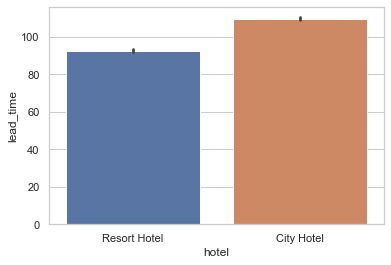

In [215]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="hotel", y="lead_time", data=df)
ax

In [167]:
df["hotel"].value_counts

<bound method IndexOpsMixin.value_counts of 0         Resort Hotel
1         Resort Hotel
2         Resort Hotel
3         Resort Hotel
4         Resort Hotel
              ...     
119385      City Hotel
119386      City Hotel
119387      City Hotel
119388      City Hotel
119389      City Hotel
Name: hotel, Length: 119390, dtype: object>

In [172]:
#df["hotel"].value_counts(dropna=False)

In [173]:
df["agent"].value_counts(dropna=False)

9.0      31961
NaN      16340
240.0    13922
1.0       7191
14.0      3640
         ...  
117.0        1
294.0        1
352.0        1
158.0        1
472.0        1
Name: agent, Length: 334, dtype: int64

In [174]:
df.shape

(119390, 32)

In [175]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [176]:
df.drop(labels = ["agent", "company"], axis=1, inplace= True)

In [177]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [178]:
cols = df.columns

for i in cols:
    print(i, '\n', df[i].unique(), '\n', '\n' , '-'*30)

hotel 
 ['Resort Hotel' 'City Hotel'] 
 
 ------------------------------
is_canceled 
 [0 1] 
 
 ------------------------------
lead_time 
 [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 

In [179]:
#first method to fill all the NaN values using the most frequent value in the respective column


#df = df.fillna(df.mode().iloc[0], inplace=True)

#another method
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [180]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [181]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

In [182]:
#X = df.drop(["is_canceled"], axis=1)
#y = df["is_canceled"]

X = df.iloc[:,1:]
y = df.iloc[:,0]

In [183]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [189]:
ct = make_column_transformer(
    ( OneHotEncoder(), ['meal','distribution_channel','reservation_status','reservation_status_date',
                        'country','arrival_date_month', 
                        'market_segment','deposit_type','customer_type', 'reserved_room_type',
                        'assigned_room_type']), remainder = 'passthrough'
)



In [197]:
ct_y = make_column_transformer(
    ( OneHotEncoder(), ['hotel']), remainder = 'passthrough'
)

In [198]:
y = ct_y.fit_transform(y).toarray()

IndexError: tuple index out of range

In [199]:
y

0         Resort Hotel
1         Resort Hotel
2         Resort Hotel
3         Resort Hotel
4         Resort Hotel
              ...     
119385      City Hotel
119386      City Hotel
119387      City Hotel
119388      City Hotel
119389      City Hotel
Name: hotel, Length: 119390, dtype: object

In [200]:
X = ct.fit_transform(X).toarray()


ValueError: Specifying the columns using strings is only supported for pandas DataFrames

In [201]:
X

array([[  1.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  1.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  1.  ,   0.  ,   0.  , ...,  75.  ,   0.  ,   0.  ],
       ...,
       [  1.  ,   0.  ,   0.  , ..., 157.71,   0.  ,   4.  ],
       [  1.  ,   0.  ,   0.  , ..., 104.4 ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   1.  , ..., 151.2 ,   0.  ,   2.  ]])

In [202]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Another important note to make here is that we just saw the number of features exploding from just 28 to 256. 
That's a huge number. Generally, more number of features in any dataset leads to the curse of dimensionality. 
It simply means that our model will have too many unncessary information to process, which will eventually hamper 
its processing time and efficiency.

To avoid the curse of dimensionality, we use something known as Dimensionality Reduction algorithms. 
One of the most used one is known as PCA - Principal Component Analysis. 
We are going to use the same. However, one small requirement of PCA is that the data it is applied on should have 
a sandar scale. Which can be achieved by sklearn's Standard Scalar function as follows

In [204]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print("X_train ---------->\n", X_train, "\nX_test -------->\n", X_test)

X_train ---------->
 [[ 0.54036534 -0.0823272  -0.37034568 ...  1.38185952 -0.25462991
  -0.71991517]
 [ 0.54036534 -0.0823272  -0.37034568 ...  0.44713919 -0.25462991
  -0.71991517]
 [ 0.54036534 -0.0823272  -0.37034568 ...  0.98096836 -0.25462991
   1.80114067]
 ...
 [ 0.54036534 -0.0823272  -0.37034568 ... -0.19470211 -0.25462991
   3.06166858]
 [ 0.54036534 -0.0823272  -0.37034568 ... -0.24455386 -0.25462991
  -0.71991517]
 [ 0.54036534 -0.0823272  -0.37034568 ...  1.20945555 -0.25462991
  -0.71991517]] 
X_test -------->
 [[ 0.54036534 -0.0823272  -0.37034568 ... -1.33381462 -0.25462991
  -0.71991517]
 [ 0.54036534 -0.0823272  -0.37034568 ... -0.32556295 -0.25462991
  -0.71991517]
 [ 0.54036534 -0.0823272  -0.37034568 ... -0.82615762 -0.25462991
  -0.71991517]
 ...
 [-1.85059983 -0.0823272  -0.37034568 ...  0.37859303 -0.25462991
  -0.71991517]
 [ 0.54036534 -0.0823272  -0.37034568 ... -0.14069604 -0.25462991
  -0.71991517]
 [ 0.54036534 -0.0823272  -0.37034568 ... -0.47304105 -0.2

In [205]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 100)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [207]:
explained_variance

array([0.00526451, 0.00364515, 0.0030908 , 0.0029126 , 0.0023546 ,
       0.0022433 , 0.00191447, 0.0018587 , 0.00179552, 0.00174985,
       0.00172362, 0.00165369, 0.00164094, 0.00163025, 0.00159907,
       0.00157324, 0.00156427, 0.00156095, 0.00154612, 0.00152182,
       0.00151219, 0.00149876, 0.0014781 , 0.00146723, 0.00145058,
       0.00144346, 0.00140713, 0.00136683, 0.00133286, 0.00128294,
       0.00127105, 0.00125971, 0.00123994, 0.00116637, 0.00114686,
       0.00112698, 0.00111491, 0.00109176, 0.00107522, 0.00106444,
       0.0010572 , 0.00103518, 0.00102489, 0.00101777, 0.00099589,
       0.00099139, 0.00099016, 0.00098216, 0.00097863, 0.00096982,
       0.00096671, 0.00096624, 0.00096214, 0.00095577, 0.00095273,
       0.00094818, 0.00094564, 0.00094338, 0.00094084, 0.00093847,
       0.00093493, 0.00093453, 0.00093354, 0.0009297 , 0.00092656,
       0.00092641, 0.00092356, 0.00092284, 0.00092107, 0.00091765,
       0.00091679, 0.00091451, 0.00091401, 0.0009116 , 0.00091

In [206]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=1000)
classifier.fit(X_train, y_train)

C:\Users\Zenia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [208]:
y_pred = classifier.predict(X_test)

In [209]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[14453,  1472],
       [ 3533,  4420]], dtype=int64)

In [210]:
(14453+4420)/(3533+1472+14453+4420)

0.7903928302202865

# Another Solution , EDA 

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119390 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           119390 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [219]:
print("Nan in each columns" , df.isna().sum(), sep='\n')

Nan in each columns
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of

In [224]:
#df["hotel"].value_counts()
#data['hotel'] = data['hotel'].map({'Resort Hotel':0, 'City Hotel':1})
#data['hotel'].unique()
#data['arrival_date_month'].unique()
#data['arrival_date_month'] = data['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12})
#data['arrival_date_month'].unique()
#data['customer_type'].unique()
#data['deposit_type'].unique()
#data['reservation_status'].unique()
#data['assigned_room_type'].unique()

In [226]:
"""

# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column. 
data['customer_type']= label_encoder.fit_transform(data['customer_type']) 
data['assigned_room_type'] = label_encoder.fit_transform(data['assigned_room_type'])
data['deposit_type'] = label_encoder.fit_transform(data['deposit_type'])
data['reservation_status'] = label_encoder.fit_transform(data['reservation_status'])
data['meal'] = label_encoder.fit_transform(data['meal'])
data['country'] = label_encoder.fit_transform(data['country'])
data['distribution_channel'] = label_encoder.fit_transform(data['distribution_channel'])
data['market_segment'] = label_encoder.fit_transform(data['market_segment'])
data['reserved_room_type'] = label_encoder.fit_transform(data['reserved_room_type'])
data['reservation_status_date'] = label_encoder.fit_transform(data['reservation_status_date'])
  
print('customer_type:', data['customer_type'].unique())
print('reservation_status', data['reservation_status'].unique())
print('deposit_type', data['deposit_type'].unique())
print('assigned_room_type', data['assigned_room_type'].unique())
print('meal', data['meal'].unique())
print('Country:',data['country'].unique())
print('Dist_Channel:',data['distribution_channel'].unique())
print('Market_seg:', data['market_segment'].unique())
print('reserved_room_type:', data['reserved_room_type'].unique())



"""


"\n\n# Import label encoder \nfrom sklearn import preprocessing \n  \n# label_encoder object knows how to understand word labels. \nlabel_encoder = preprocessing.LabelEncoder() \n  \n# Encode labels in column. \ndata['customer_type']= label_encoder.fit_transform(data['customer_type']) \ndata['assigned_room_type'] = label_encoder.fit_transform(data['assigned_room_type'])\ndata['deposit_type'] = label_encoder.fit_transform(data['deposit_type'])\ndata['reservation_status'] = label_encoder.fit_transform(data['reservation_status'])\ndata['meal'] = label_encoder.fit_transform(data['meal'])\ndata['country'] = label_encoder.fit_transform(data['country'])\ndata['distribution_channel'] = label_encoder.fit_transform(data['distribution_channel'])\ndata['market_segment'] = label_encoder.fit_transform(data['market_segment'])\ndata['reserved_room_type'] = label_encoder.fit_transform(data['reserved_room_type'])\ndata['reservation_status_date'] = label_encoder.fit_transform(data['reservation_status_dat

In [227]:
#output would be like:

"""


assigned_room_type [0 2 3 4 6 5 8 1 7 9]
meal [0 1 2 3 4]
Country: [ 59 134 166  51  76 138 123 126   6 132  43  56  15  29  34  66  81  46
 139 151  11  52  42  25  54 112  27 100 122 150   3  75  31 106 103 163
 101 133 147  30  12  23  99 159 171  40 172 173  48  91  38  72   5 158
  82  71  69  80  77  60   4  63 165  83  28  41  35  61  92 120 105 168
 149   1  55  86 127  73  94 130 143 152  13  20 125 155  47 107 116   7
  85  98  39  33 114  36 148 162  19  32  84 153 144  14 141 170 131 137
  50 129 109 115  79  49 124  37  21 102 154 160  44  90  53  78  70 140
  88 104  18 167  74 156 121  16 169 161  58  22  62 157  64  87  97  65
 111 164 117  57 110 128  17  95 108 118  24 135  26   0   2 146  45 136
  68  96   9  67   8 113 119  89 142  10 145  93]
Dist_Channel: [0 3 1 2]
Market_seg: [2 6 3 5 4 1 0]
reserved_room_type: [0 2 3 4 6 5 7 1]



"""



In [228]:
"""



from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import train_test_split 

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import GridSearchCV


from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import AdaBoostRegressor


"""

'\n\n\n\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.linear_model import LogisticRegression\n\n\nfrom sklearn.model_selection import train_test_split \n\nfrom sklearn import metrics\nfrom sklearn.metrics import r2_score\nfrom sklearn.model_selection import cross_val_score\n\n\nfrom sklearn.linear_model import Ridge\nfrom sklearn.linear_model import Lasso\n\nfrom sklearn.model_selection import GridSearchCV\n\n\nfrom sklearn.ensemble import RandomForestRegressor \nfrom sklearn.ensemble import AdaBoostRegressor\n\n\n'

In [230]:
"""
#Let's now use Regression modles to check the best one
## Logistic Regression##

X = data.drop(['previous_cancellations'], axis = 1)
y = data['previous_cancellations']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)

print('Mean Absolute Error_lng:', metrics.mean_absolute_error(y_test, y_pred).round(3))  
print('Mean Squared Error_lng:', metrics.mean_squared_error(y_test, y_pred).round(3))  
print('Root Mean Squared Error_lng:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3))
print('r2_score_lng:', r2_score(y_test, y_pred).round(3))



#output be like:


Mean Absolute Error_lng: 0.173
Mean Squared Error_lng: 0.512
Root Mean Squared Error_lng: 0.715
r2_score_lng: 0.07


"""

"\n#Let's now use Regression modles to check the best one\n\n\nX = data.drop(['previous_cancellations'], axis = 1)\ny = data['previous_cancellations']\n\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)\n\nregressor = LinearRegression()  \nregressor.fit(X_train, y_train) #training the algorithm\ny_pred = regressor.predict(X_test)\n\nprint('Mean Absolute Error_lng:', metrics.mean_absolute_error(y_test, y_pred).round(3))  \nprint('Mean Squared Error_lng:', metrics.mean_squared_error(y_test, y_pred).round(3))  \nprint('Root Mean Squared Error_lng:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3))\nprint('r2_score_lng:', r2_score(y_test, y_pred).round(3))\n\n\n\n#output be like:\n\n\nMean Absolute Error_lng: 0.173\nMean Squared Error_lng: 0.512\nRoot Mean Squared Error_lng: 0.715\nr2_score_lng: 0.07\n\n\n"

In [231]:
"""
## Ridge Regression##


ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train) #training the algorithm

y_pred = ridge.predict(X_test)

print('Mean Absolute Error_ridge:', metrics.mean_absolute_error(y_test, y_pred).round(3))  
print('Mean Squared Error_ridge:', metrics.mean_squared_error(y_test, y_pred).round(3))  
print('Root Mean Squared Error_ridge:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3))
print('r2_score_ridge:', r2_score(y_test, y_pred).round(3))


#output be like:

Mean Absolute Error_ridge: 0.173
Mean Squared Error_ridge: 0.512
Root Mean Squared Error_ridge: 0.715
r2_score_ridge: 0.07


"""

"\n## Ridge Regression##\n\n\nridge = Ridge(alpha=1.0)\nridge.fit(X_train, y_train) #training the algorithm\n\ny_pred = ridge.predict(X_test)\n\nprint('Mean Absolute Error_ridge:', metrics.mean_absolute_error(y_test, y_pred).round(3))  \nprint('Mean Squared Error_ridge:', metrics.mean_squared_error(y_test, y_pred).round(3))  \nprint('Root Mean Squared Error_ridge:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3))\nprint('r2_score_ridge:', r2_score(y_test, y_pred).round(3))\n\n\n#output be like:\n\nMean Absolute Error_ridge: 0.173\nMean Squared Error_ridge: 0.512\nRoot Mean Squared Error_ridge: 0.715\nr2_score_ridge: 0.07\n\n\n"

In [233]:
"""

## Lasso Regression above##

clf = Lasso(alpha=0.1)

clf.fit(X_train, y_train) #training the algorithm

y_pred = clf.predict(X_test)

print('Mean Absolute Error_lasso:', metrics.mean_absolute_error(y_test, y_pred).round(3))  
print('Mean Squared Error_lasso:', metrics.mean_squared_error(y_test, y_pred).round(3))  
print('Root Mean Squared Error_lasso:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3))
print('r2_score_lasso:', r2_score(y_test, y_pred).round(3))


#output be like:

Mean Absolute Error_lasso: 0.168
Mean Squared Error_lasso: 0.529
Root Mean Squared Error_lasso: 0.727
r2_score_lasso: 0.039

"""

"\n\n## Lasso Regression above##\n\nclf = Lasso(alpha=0.1)\n\nclf.fit(X_train, y_train) #training the algorithm\n\ny_pred = clf.predict(X_test)\n\nprint('Mean Absolute Error_lasso:', metrics.mean_absolute_error(y_test, y_pred).round(3))  \nprint('Mean Squared Error_lasso:', metrics.mean_squared_error(y_test, y_pred).round(3))  \nprint('Root Mean Squared Error_lasso:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3))\nprint('r2_score_lasso:', r2_score(y_test, y_pred).round(3))\n\n\n#output be like:\n\nMean Absolute Error_lasso: 0.168\nMean Squared Error_lasso: 0.529\nRoot Mean Squared Error_lasso: 0.727\nr2_score_lasso: 0.039\n\n"

In [234]:
"""
## Logistics Regression above ##

logreg = LogisticRegression(solver = 'lbfgs')
# fit the model with data
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

print('Mean Absolute Error_logreg:', metrics.mean_absolute_error(y_test, y_pred).round(3))  
print('Mean Squared Error_logreg:', metrics.mean_squared_error(y_test, y_pred).round(3))  
print('Root Mean Squared Error_logreg:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3))
print('r2_score_logreg:', r2_score(y_test, y_pred).round(3))


#output be like:

Mean Absolute Error_logreg: 0.05
Mean Squared Error_logreg: 0.346
Root Mean Squared Error_logreg: 0.588
r2_score_logreg: 0.372
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

"""

"\n## Logistics Regression above ##\n\nlogreg = LogisticRegression(solver = 'lbfgs')\n# fit the model with data\nlogreg.fit(X_train,y_train)\ny_pred=logreg.predict(X_test)\n\nprint('Mean Absolute Error_logreg:', metrics.mean_absolute_error(y_test, y_pred).round(3))  \nprint('Mean Squared Error_logreg:', metrics.mean_squared_error(y_test, y_pred).round(3))  \nprint('Root Mean Squared Error_logreg:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3))\nprint('r2_score_logreg:', r2_score(y_test, y_pred).round(3))\n\n\n#output be like:\n\nMean Absolute Error_logreg: 0.05\nMean Squared Error_logreg: 0.346\nRoot Mean Squared Error_logreg: 0.588\nr2_score_logreg: 0.372\n/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):\nSTOP: TOTAL NO. of ITERATIONS REACHED LIMIT.\n\nIncrease the number of iterations (max_iter) or scale the data as shown in:\n    https://scikit-learn.org/stable/modules/preprocessing

In [235]:
"""

# Ridge Regression with Gridsearch ##
from sklearn.model_selection import GridSearchCV

parameters= {'alpha':[50,75,100,200, 230, 250], 'random_state':[5,10,20,50,], 'max_iter':[0.1,0.5,1,2,3,5]}

grid = GridSearchCV(ridge, parameters, cv=5)
grid.fit(X_train, y_train)
print ("Best_Score_Ridge : ", grid.best_score_)
print('best_para_Ridge:', grid.best_params_)


#output:
Best_Score_Ridge :  0.06461225815247648
best_para_Ridge: {'alpha': 75, 'max_iter': 0.1, 'random_state': 5}


"""

'\n\n# Ridge Regression with Gridsearch ##\nfrom sklearn.model_selection import GridSearchCV\n\nparameters= {\'alpha\':[50,75,100,200, 230, 250], \'random_state\':[5,10,20,50,], \'max_iter\':[0.1,0.5,1,2,3,5]}\n\ngrid = GridSearchCV(ridge, parameters, cv=5)\ngrid.fit(X_train, y_train)\nprint ("Best_Score_Ridge : ", grid.best_score_)\nprint(\'best_para_Ridge:\', grid.best_params_)\n\n\n#output:\nBest_Score_Ridge :  0.06461225815247648\nbest_para_Ridge: {\'alpha\': 75, \'max_iter\': 0.1, \'random_state\': 5}\n\n\n'

In [236]:
"""

# Lasso Regression with Gridsearch ##
from sklearn.model_selection import GridSearchCV

parameters= {'alpha':[200, 230, 250,265, 270, 275, 290, 300], 'random_state':[2,5,10,20,50,], 'max_iter':[5,10,15,20,30,50,100]}

grid = GridSearchCV(clf, parameters, cv=5)
grid.fit(X_train, y_train)
print ("Best_Score_Lasso : ", grid.best_score_)
print('best_para_Lasso:', grid.best_params_)


#output:
Best_Score_Lasso :  -0.00014895734756961154
best_para_Lasso: {'alpha': 200, 'max_iter': 5, 'random_state': 2}


"""

'\n\n# Lasso Regression with Gridsearch ##\nfrom sklearn.model_selection import GridSearchCV\n\nparameters= {\'alpha\':[200, 230, 250,265, 270, 275, 290, 300], \'random_state\':[2,5,10,20,50,], \'max_iter\':[5,10,15,20,30,50,100]}\n\ngrid = GridSearchCV(clf, parameters, cv=5)\ngrid.fit(X_train, y_train)\nprint ("Best_Score_Lasso : ", grid.best_score_)\nprint(\'best_para_Lasso:\', grid.best_params_)\n\n\n#output:\nBest_Score_Lasso :  -0.00014895734756961154\nbest_para_Lasso: {\'alpha\': 200, \'max_iter\': 5, \'random_state\': 2}\n\n\n'

In [237]:
"""

 # create regressor object 
rfe = RandomForestRegressor(n_estimators = 100, random_state = 42) 
  
# fit the regressor with x and y data 
rfe.fit(X, y)   
y_pred=rfe.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score_RFE:', r2_score(y_test, y_pred).round(3))



Mean Absolute Error: 0.0026966871396349322
Mean Squared Error: 0.0018397040097022479
Root Mean Squared Error: 0.04289177088559352
r2_score_RFE: 0.997
"""

"\n\n # create regressor object \nrfe = RandomForestRegressor(n_estimators = 100, random_state = 42) \n  \n# fit the regressor with x and y data \nrfe.fit(X, y)   \ny_pred=rfe.predict(X_test)\nprint('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  \nprint('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  \nprint('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))\nprint('r2_score_RFE:', r2_score(y_test, y_pred).round(3))\n\n\n\nMean Absolute Error: 0.0026966871396349322\nMean Squared Error: 0.0018397040097022479\nRoot Mean Squared Error: 0.04289177088559352\nr2_score_RFE: 0.997\n"

In [238]:
"""

ABR = AdaBoostRegressor(n_estimators = 100, random_state = 42) 
  
# fit the regressor with x and y data 
ABR.fit(X, y)   
y_pred=ABR.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score_ABR:', r2_score(y_test, y_pred).round(3))

Mean Absolute Error: 0.1327546395737191
Mean Squared Error: 0.13339192971262945
Root Mean Squared Error: 0.3652285992534394
r2_score_ABR: 0.758
"""

"\n\nABR = AdaBoostRegressor(n_estimators = 100, random_state = 42) \n  \n# fit the regressor with x and y data \nABR.fit(X, y)   \ny_pred=ABR.predict(X_test)\nprint('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  \nprint('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  \nprint('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))\nprint('r2_score_ABR:', r2_score(y_test, y_pred).round(3))\n\nMean Absolute Error: 0.1327546395737191\nMean Squared Error: 0.13339192971262945\nRoot Mean Squared Error: 0.3652285992534394\nr2_score_ABR: 0.758\n"

In [240]:
"""

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Lead time for booking year on year

plt.figure(figsize=(10,5))
sns.barplot(x ='arrival_date_year', y = 'lead_time', data = data1)


plt.figure(figsize = (12,5))
sns.barplot(x ='arrival_date_month', y = 'adults', data = data1)


plt.figure(figsize=(10,5))
data1.groupby(['arrival_date_year', 'arrival_date_month']).size().plot.bar()


plt.figure(figsize=(10,5))
data1.groupby(['arrival_date_month'])['arrival_date_year'].size().plot.bar()



plt.figure(figsize = (30,10))
data1.groupby(['country']).size().sort_values(ascending= False).plot.bar()



data1.groupby(['country']).size().sort_values(ascending=False)



data.groupby(['arrival_date_month','arrival_date_year'])['children', 'babies'].sum().plot.bar()
plt.figure(figsize =(15,5))



plt.title('Cancellation')
plt.ylabel('Cancel_Sum')
data1.groupby(['hotel','arrival_date_year'])['is_canceled'].sum().plot.bar()



data1.groupby(['hotel'])['booking_changes'].sum().plot.pie()
plt.figure(figsize =(10,10))
plt.show()



data1.groupby(['country'])['required_car_parking_spaces'].sum().sort_values(ascending=False)


plt.figure(figsize = (30,10))
data1.groupby(['country'])['required_car_parking_spaces'].sum().sort_values(ascending=False).plot.bar()


data1.groupby(['deposit_type']).size().plot.bar()




"""

"\n\nimport matplotlib.pyplot as plt\n%matplotlib inline\nimport seaborn as sns\n\n#Lead time for booking year on year\n\nplt.figure(figsize=(10,5))\nsns.barplot(x ='arrival_date_year', y = 'lead_time', data = data1)\n\n\nplt.figure(figsize = (12,5))\nsns.barplot(x ='arrival_date_month', y = 'adults', data = data1)\n\n\nplt.figure(figsize=(10,5))\ndata1.groupby(['arrival_date_year', 'arrival_date_month']).size().plot.bar()\n\n\nplt.figure(figsize=(10,5))\ndata1.groupby(['arrival_date_month'])['arrival_date_year'].size().plot.bar()\n\n\n\nplt.figure(figsize = (30,10))\ndata1.groupby(['country']).size().sort_values(ascending= False).plot.bar()\n\n\n\ndata1.groupby(['country']).size().sort_values(ascending=False)\n\n\n\ndata.groupby(['arrival_date_month','arrival_date_year'])['children', 'babies'].sum().plot.bar()\nplt.figure(figsize =(15,5))\n\n\n\nplt.title('Cancellation')\nplt.ylabel('Cancel_Sum')\n\ndata1.groupby(['hotel','arrival_date_year'])['is_canceled'].sum().plot.bar()\n\n\n\n"

In [241]:
df.head().transpose()

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2
